<a href="https://colab.research.google.com/github/sjinu96/Pattern-Recognition/blob/main/K-Means%20Clustering(Numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2021학년도 2학기 패턴인식 HW1  

**제출자 : 서울시립대학교 수학과 박진수(2016540018)**

작성자: 서울시립대학교 인공지능학과 정지영 교수

# 1. Environment Setting



In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow

# Accessing My Google Drxve')
drive.mount('/content/drive')

# 2. Implementing K-means
아래 K-means를 실행할 수 있도록 Coding cell이 5개 있습니다.

**1) Data loading cell**

K-means를 위한 data를 loading 하는 셀입니다. 이부분은 코드가 완성되어 있습니다. Shift+Enter로 실행하여 data의 분포를 그림으로 확인하세요 given_data.png와 같은 그래프가 떠야합니다

**2) findClosestCentroids function cell**

입력데이터 X (m x n) 와 K개의 중앙점 위치 c (K x n)가 주어졌을 때, 각 입력데이터가 몇번째 중앙점과 가장 가까운지 계산하여 idx 로 반환합니다. 이때 idx는 m-dimensional vector이며 0에서 K-1 사이의 인덱스로 이루어져있습니다.

Hint: numpy의 zeros, power, argmin 등의 함수를 활용하세요.

**3) computeMeans function cell**

입력데이터 X (m x n), 각 입력데이터가 몇번째 cluster에 속하는지에 대한 정보 idx (m x 1), cluster의 갯수 K가 주어졌을 때, 새로운 centroid의 위치를 계산하여 c로 반환합니다. c는 (K x n) 크기가 되어야 합니다. 

Hint: numpy의 zeros, where, shape, reshape, mean 등의 함수를 활용하세요.

**4) kMeansInitCentroids function cell**

제일 처음 입력데이터 X (m x n) 중에서 random하게 K개를 골라 중앙점 c로 반환합니다. c는 (K x n) 크기가 되어야 합니다. 

Hint: numpy의 random.choice 등의 함수를 활용하세요.

**5) Run cell**

K-means를 실행하고 결과를 plot하기 위한 셀입니다. 이부분은 코드가 완성되어 있습니다. 위의 function 3개 코드를 구현하면 이 셀의 코드를 실행하였을 때 expected_result.png와 같은 결과를 얻을수 있습니다.
구현의 편의를 위하여, converge 조건을 따로 정하지 않고, iteration을 30번 수행하면 loop이 끝나도록 구현하였습니다.

 




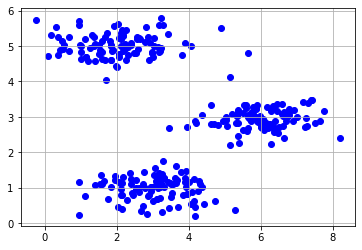

In [4]:
# Data loading
data_path = "drive/My Drive/Colab Notebooks/Pattern Recognition/hw1/"
data = scipy.io.loadmat(data_path+'ex7data2.mat')
X = data['X']
plt.scatter(X[:,0],X[:,1],c='b')
plt.grid(True)

In [140]:
def findClosestCentroids(X, c):
  m, n = np.shape(X)
  K, n = np.shape(c)  
  idx = -1*np.ones(m) # Initialization
  
  # 이 구간을 구현하세요 (for문을 활용하세요)
  for i in range(m):
      idx[i]=np.argmin([sum((X[i]-c[j])**2) for j in range(K)]) # L2 norm을 기준으로 가장 작은 값을 보이는 index를 반환. 

  return idx

In [141]:
def computeMeans(X, idx, K):
  c = np.zeros((K, n))

  # 이 구간을 구현하세요 (for문을 활용하세요)
  for j in range(K):
    c[j]=np.mean(X[np.where(idx==j)], axis=0) # idx로 j를 갖는 샘플들의 평균

  return c

In [142]:
def kMeansInitCentroids(X, K):
  m, n = np.shape(X)

  # 이 구간을 구현하세요 (최소 2줄로 구현가능!)
  sample_idx=np.random.choice(range(m), size=K, replace=False ) # 비복원추출, K개의 sample index 
  c = X[sample_idx]

  return c

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


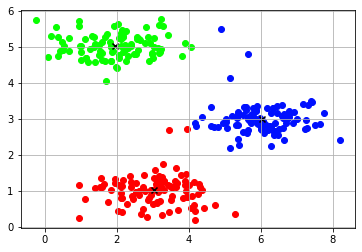

In [159]:
# Run K-means

# Initialize centroids
iterations = 30
K=3
centroids = kMeansInitCentroids(X, K)

for i in range(0,iterations):
  # Cluster assignment step: Assign each data point to the closest centroid
  # idx(i) corresponds to c^(i), the index of the centroid assigned to example i
  idx = findClosestCentroids(X, centroids)

  # Move centroid step: Compute means based on cetroid assignments
  centroids = computeMeans(X, idx, K)

# Plot result
cmap = plt.cm.get_cmap('hsv', K+1)
for j in range(0,K):
  assigned_idx = np.where(idx==j)
  dim, num = np.shape(assigned_idx)
  assigned_idx = np.reshape(assigned_idx,num)
  
  plt.scatter(X[assigned_idx,0],X[assigned_idx,1],c=cmap(j))
  plt.scatter(centroids[j,0],centroids[j,1],c='k',marker='x')
plt.axis('equal')
plt.grid(True)